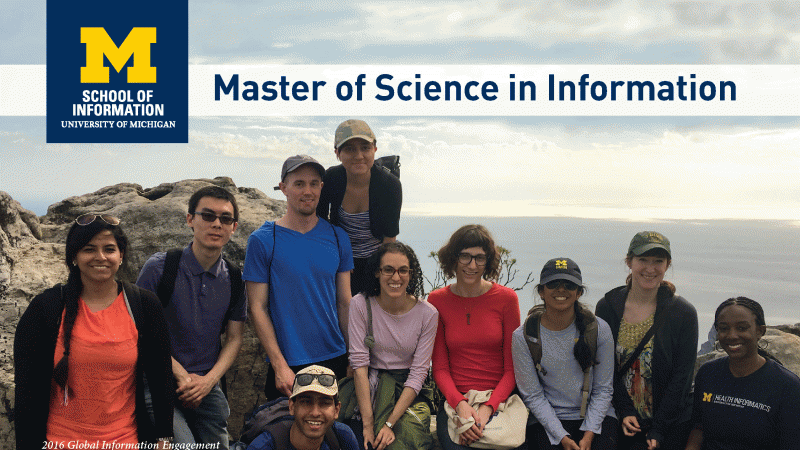

In [1]:
import PIL
from PIL import Image
from IPython.display import display

file = "readonly/msi_recruitment.gif"
#opening an converting the file to rgb
image = Image.open(file).convert("RGB")
display(image)

In [2]:
#trying to create a contact sheet of images
from PIL import ImageEnhance
#the image enhance module has a feature which allows us to edit the brightness of an image
help(ImageEnhance)


Help on module PIL.ImageEnhance in PIL:

NAME
    PIL.ImageEnhance

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # image enhancement classes
    #
    # For a background, see "Image Processing By Interpolation and
    # Extrapolation", Paul Haeberli and Douglas Voorhies.  Available
    # at http://www.graficaobscura.com/interp/index.html
    #
    # History:
    # 1996-03-23 fl  Created
    # 2009-06-16 fl  Fixed mean calculation
    #
    # Copyright (c) Secret Labs AB 1997.
    # Copyright (c) Fredrik Lundh 1996.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    _Enhance(builtins.object)
        Brightness
        Color
        Contrast
        Sharpness
    
    class Brightness(_Enhance)
     |  Brightness(image)
     |  
     |  Adjust image brightness.
     |  
     |  This class can be used to control the brightness of an image.  An
     |  enhancement factor of 0.0 gives a black image. A factor of 1.0 gives the

In [3]:
#writing a loop to generate 10 images of different brightness
enhancer = ImageEnhance.Color(image)
images = []
for i in range(10):
    #we'll divide the value of i by 10 everytime the loop is run
    images.append(enhancer.enhance(i/10))
print(images)

[<PIL.Image.Image image mode=RGB size=800x450 at 0x1F0127CE1C0>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1F02BE71E20>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1F0127BD460>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1F0127BDBE0>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1F0127BDE20>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1F012AA3FA0>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1F012917FA0>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1F012917F70>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1F012917F40>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1F012917E20>]


In [4]:
#we want to stack the 10 generated images in a contact sheet to create one image
help(PIL.Image.new)

Help on function new in module PIL.Image:

new(mode, size, color=0)
    Creates a new image with the given mode and size.
    
    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.



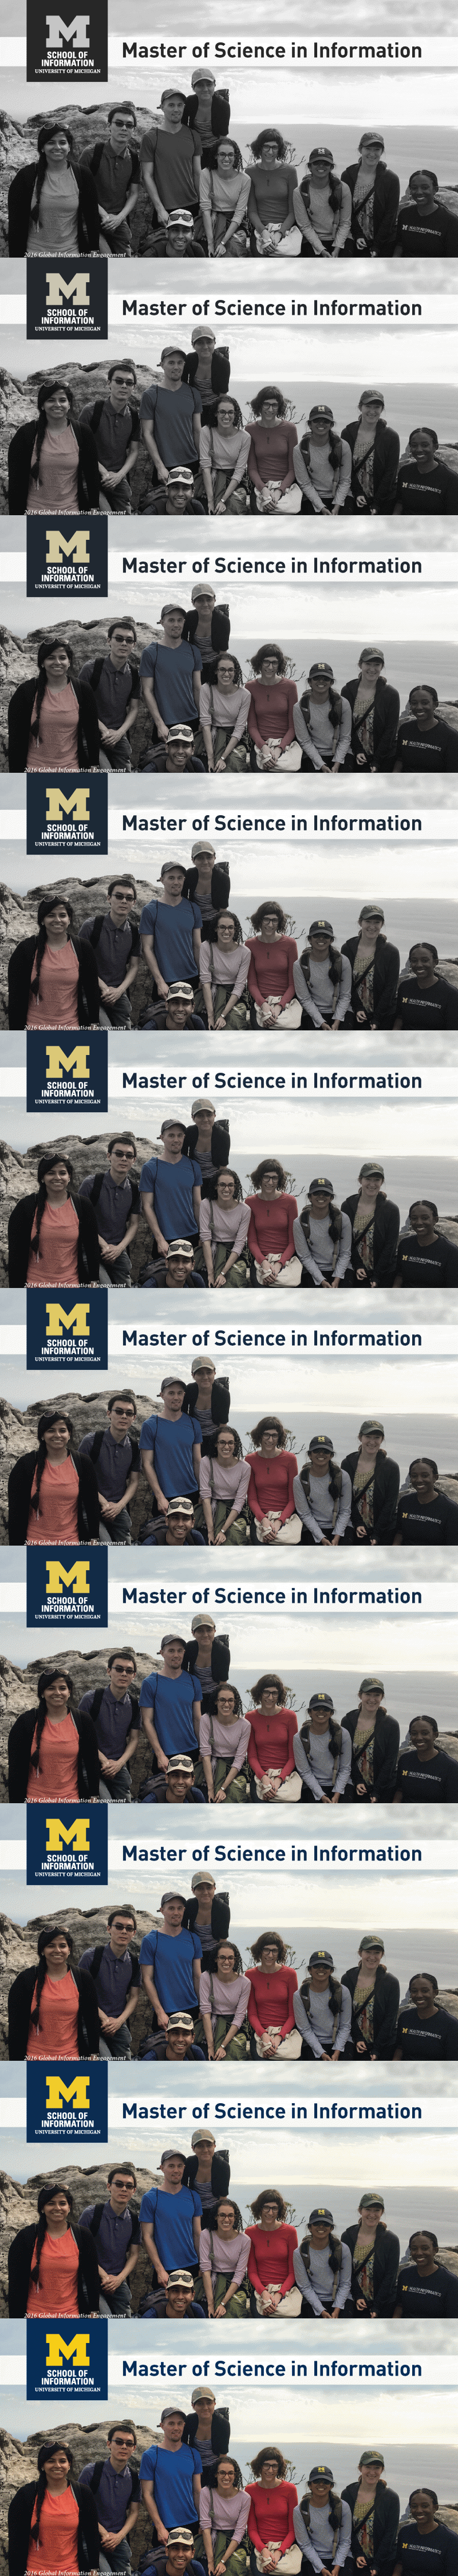

In [5]:
first_image = images[0]
#creating the canvas for our contact sheet to be stacked on
#i omiited the color parameter to set the color to black, for now
contact_sheet = PIL.Image.new(first_image.mode, (first_image.width, 10*first_image.height))

#we now have a contact sheet to paste our images in
#we need to change the height at which the images are being pasted in order for them to be stacked on each
# other and not overlayying each other

current_location = 0
#print(image.height) the height of every image is 450px

for img in images:
    contact_sheet.paste(img, (0, current_location))

    #incrementing the current location. ie. y coordinate for the image to be pasted
    current_location += 450

display(contact_sheet)


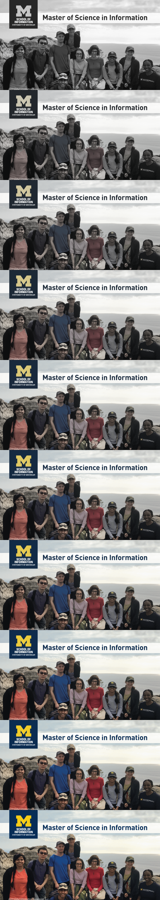

In [6]:
#our contact sheet has gotten too long so we might wanna resize it with the resize function
#the resize function takes in a tuple of width and height as parameters
#resizing to size of the original image stacked on itself
contact_sheet = contact_sheet.resize((160, 900))
display(contact_sheet)

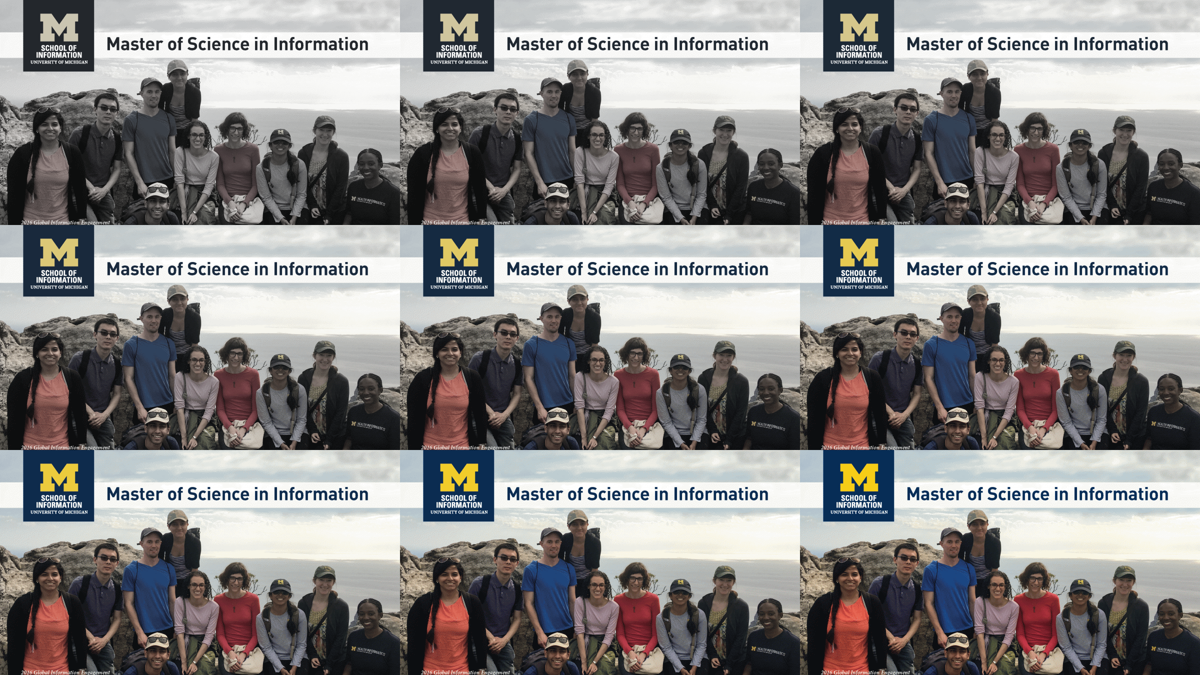

In [7]:
#trying to maximize usage of space by rearranging the images in a 3x3 grid
contact_sheet = PIL.Image.new(first_image.mode, (first_image.width * 3, first_image.height * 3))

#initializing the coordinates of the image paste points
x = 0
y = 0

#ignoring the first image in our iteration since it's black
for img in images[1:]:
    contact_sheet.paste(img, (x, y) )

    if x+first_image.width == contact_sheet.width:
        #this means that the leftmost part of our image is on the rightmost part of the contact sheet
        #this will cause our image to overlap
        #we have to move to the next line by changing the y coordinate and setting the x coordinate to 0
        y += first_image.height
        x = 0
    else:
        #our image is not going to overlap our contact sheet yet. ie there's still space to paste an image horizontally
        x += first_image.width

#resizing our image
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2), int(contact_sheet.height/2)))


display(contact_sheet)

In [8]:
from PIL import ImageDraw
help(ImageDraw)

Help on module PIL.ImageDraw in PIL:

NAME
    PIL.ImageDraw

DESCRIPTION
    # The Python Imaging Library
    # $Id$
    #
    # drawing interface operations
    #
    # History:
    # 1996-04-13 fl   Created (experimental)
    # 1996-08-07 fl   Filled polygons, ellipses.
    # 1996-08-13 fl   Added text support
    # 1998-06-28 fl   Handle I and F images
    # 1998-12-29 fl   Added arc; use arc primitive to draw ellipses
    # 1999-01-10 fl   Added shape stuff (experimental)
    # 1999-02-06 fl   Added bitmap support
    # 1999-02-11 fl   Changed all primitives to take options
    # 1999-02-20 fl   Fixed backwards compatibility
    # 2000-10-12 fl   Copy on write, when necessary
    # 2001-02-18 fl   Use default ink for bitmap/text also in fill mode
    # 2002-10-24 fl   Added support for CSS-style color strings
    # 2002-12-10 fl   Added experimental support for RGBA-on-RGB drawing
    # 2002-12-11 fl   Refactored low-level drawing API (work in progress)
    # 2004-08-26 fl   Made 